In [6]:
rajs

NameError: name 'rajs' is not defined

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('cleaned_data.csv')

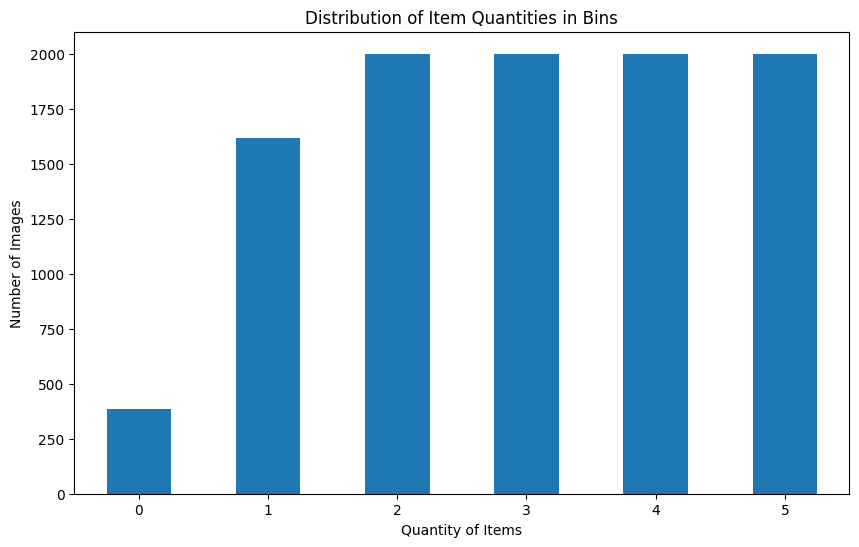

In [5]:
#class distribution visualization
#Use a histogram or bar chart to show how many images there are for each quantity of items.

# Count the occurrences of each quantity and sort the index
quantity_counts = data['quantity'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
quantity_counts.plot(kind='bar')
plt.title('Distribution of Item Quantities in Bins')
plt.xlabel('Quantity of Items')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

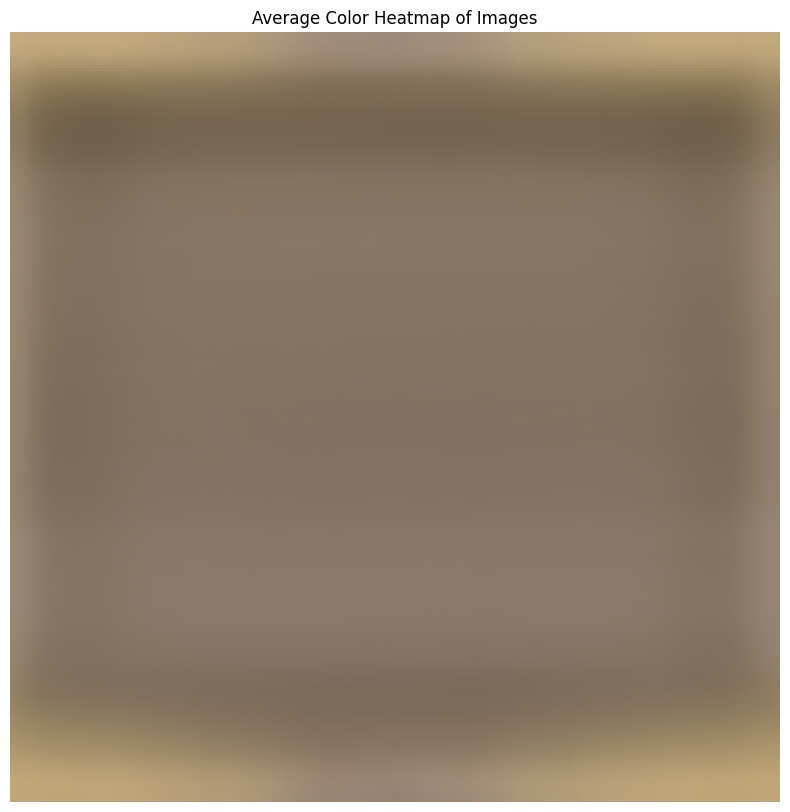

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def calculate_average_image_color(image_folder):
    image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.jpg')]
    average_colors = np.zeros((256, 256, 3), dtype=np.float32)

    for image_file in image_files:
        img = Image.open(image_file).resize((256, 256))  # Resize to ensure consistency
        img_array = np.array(img, dtype=np.float32) / 255.0  # Normalize pixel values
        average_colors += img_array

    average_colors /= len(image_files)
    return average_colors

# Define the path to your image folder
image_folder = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/noise_removed'

# Calculate the average image color
average_image_colors = calculate_average_image_color(image_folder)

# Plot the average colors as a heatmap
plt.figure(figsize=(10, 10))
plt.imshow(average_image_colors, cmap='hot', interpolation='nearest')
plt.title('Average Color Heatmap of Images')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [13]:
data.head()

filename                                               name  quantity  \
0   06933.jpg              moroso 74299 mini starter heat shield         2   
1   07621.jpg  dunecraft carol cactus science kit; o'neill me...         3   
2  115619.jpg  alex toys craft knot a quilt kit; wellness cor...         4   
3  106035.jpg  petmate furbuster pet hair collector, teal/pea...         4   
4  104008.jpg  wireless charger,itian&trade;qi 3-coil wireles...         1   

   weight  height  length  width  
0    0.25    2.00   13.90   8.50  
1    0.10    0.77    0.93   0.93  
2    4.13    3.37   13.90  11.54  
3    0.42    1.30    9.00   5.30  
4    0.70    3.40    9.00   4.20

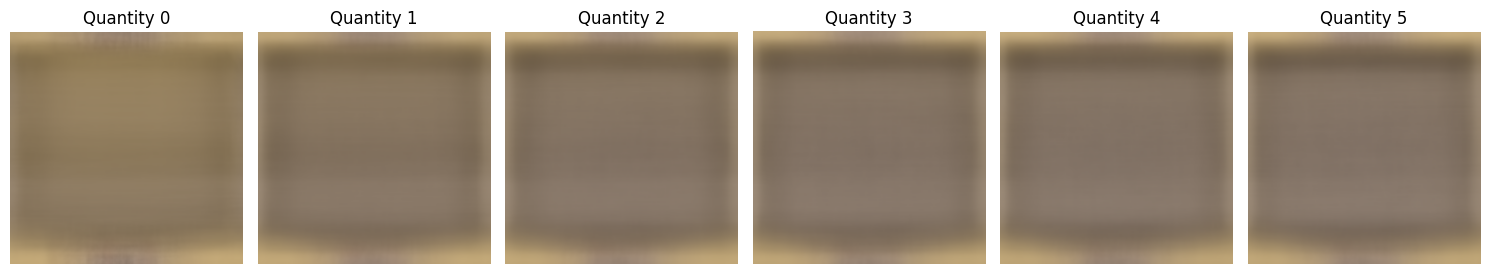

In [15]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Path to the image directory
image_folder = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/noise_removed'


# Group images by 'quantity'
grouped = data.groupby('quantity')

# Calculate average images for each quantity group
average_images = {}
for quantity, group in grouped:
    imgs = []
    for filename in group['filename']:
        img_path = os.path.join(image_folder, filename)
        if os.path.exists(img_path):
            img = Image.open(img_path).convert('RGB')
            imgs.append(np.array(img))
    if imgs:  # Check if there are any images loaded
        average_images[quantity] = np.mean(np.stack(imgs), axis=0).astype(np.uint8)

# Number of different quantities
num_quantities = len(average_images)

# Create a figure with subplots
fig, axes = plt.subplots(1, num_quantities, figsize=(15, 5))

# Check if there's only one quantity to avoid indexing error
if num_quantities == 1:
    axes = [axes]

# Display each average image
for ax, (quantity, avg_img) in zip(axes, average_images.items()):
    ax.imshow(avg_img)
    ax.set_title(f'Quantity {quantity}')
    ax.axis('off')

plt.tight_layout()
plt.show()


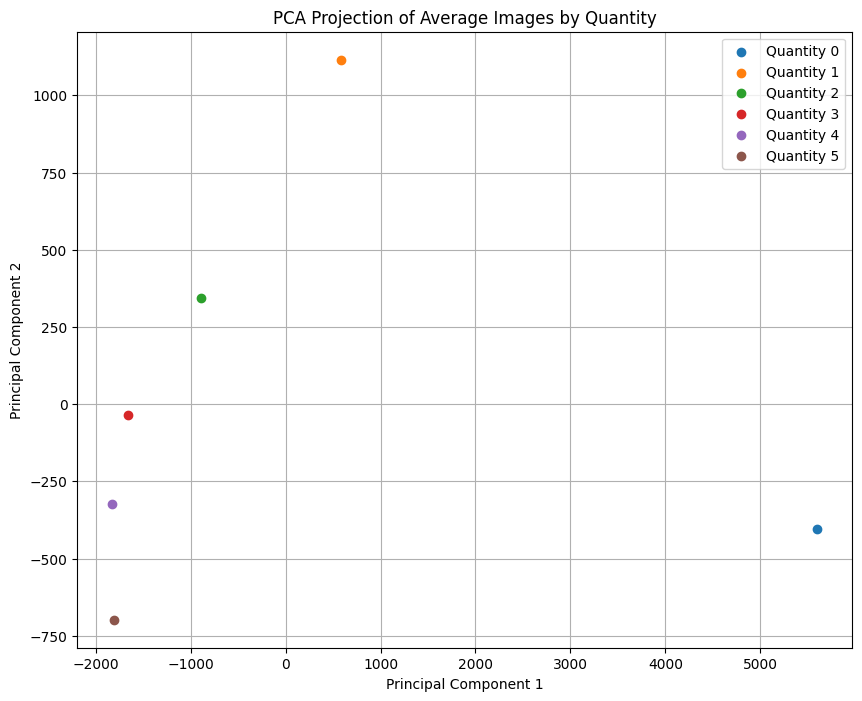

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert the average images into a format suitable for PCA
flattened_images = np.array([img.flatten() for img in average_images.values()])

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(flattened_images)

# Plot the principal components
plt.figure(figsize=(10, 8))
for i, (pc1, pc2) in enumerate(principal_components):
    plt.scatter(pc1, pc2, label=f'Quantity {list(average_images.keys())[i]}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Average Images by Quantity')
plt.legend()
plt.grid(True)
plt.show()


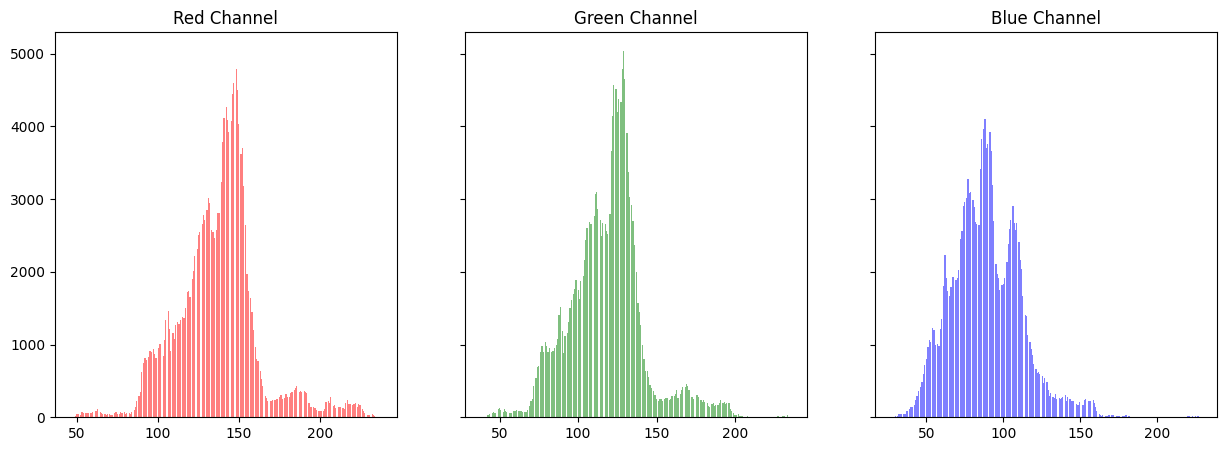

In [19]:
#color histogram visualization

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_color_histogram(image_path):
    # Load an image
    image = Image.open(image_path)
    # Convert to RGB
    image = image.convert('RGB')
    # Get color channels
    r, g, b = image.split()
    r_hist = np.array(r).flatten()
    g_hist = np.array(g).flatten()
    b_hist = np.array(b).flatten()
    # Plotting
    fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    ax[0].hist(r_hist, bins=256, color='red', alpha=0.5)
    ax[0].set_title('Red Channel')
    ax[1].hist(g_hist, bins=256, color='green', alpha=0.5)
    ax[1].set_title('Green Channel')
    ax[2].hist(b_hist, bins=256, color='blue', alpha=0.5)
    ax[2].set_title('Blue Channel')
    plt.show()

# Example usage with the first image in the folder
image_folder = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/noise_removed'
first_image = next(os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg'))
plot_color_histogram(first_image)


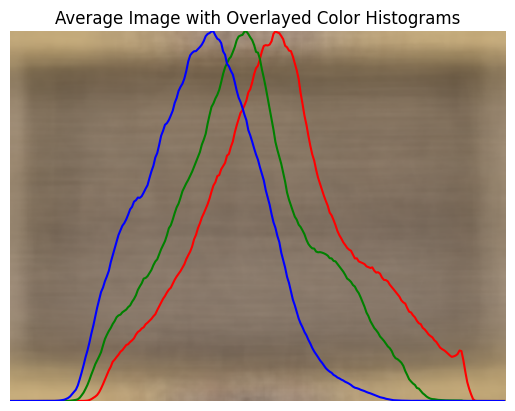

In [21]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Path to the image directory
image_folder = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/noise_removed'

# Load images and calculate the average image
def load_and_average_images(image_folder, num_images=100):
    image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.jpg')]
    images = [np.array(Image.open(file).convert('RGB')) for file in image_files[:num_images]]
    average_image = np.mean(images, axis=0).astype(np.uint8)
    return average_image, images

# Generate the average image and the list of images
avg_image, images = load_and_average_images(image_folder)

# Calculate histograms for each channel
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    hist = [np.histogram(img[:, :, i], bins=256, range=(0, 256))[0] for img in images]
    mean_hist = np.mean(hist, axis=0)
    mean_hist = (mean_hist / mean_hist.max()) * avg_image.shape[0]  # Normalize and scale histogram to image height

    plt.plot(mean_hist, color=col)

# Display the average image
plt.imshow(avg_image, extent=[0, 256, 0, avg_image.shape[0]], aspect='auto')
plt.title('Average Image with Overlayed Color Histograms')
plt.axis('off')  # Hide axis to emphasize the image
plt.show()


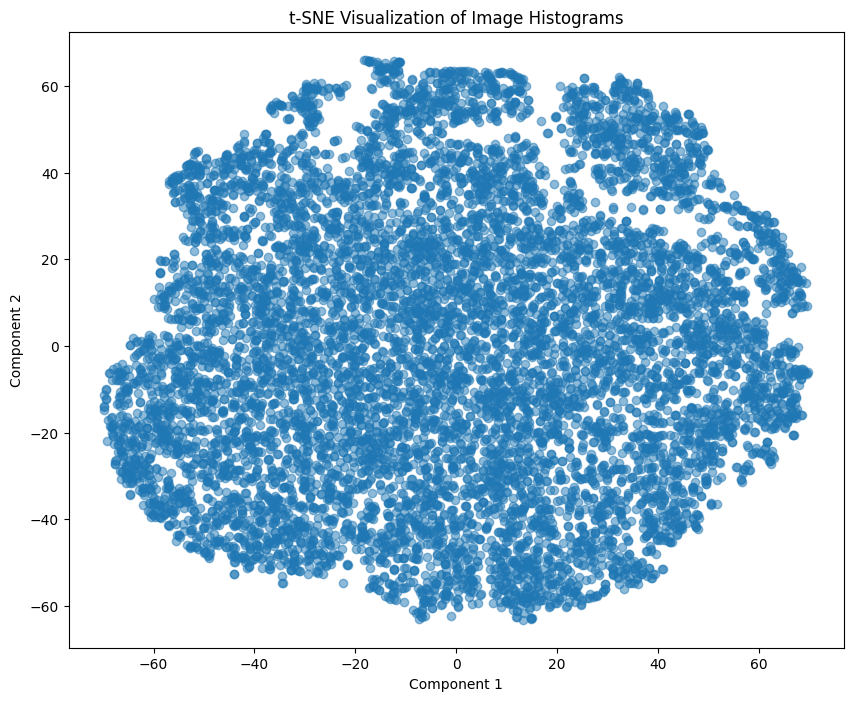

In [30]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Define the path to your image folder
image_folder = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/noise_removed'

# Function to extract color histogram features
def extract_features(image_path):
    with Image.open(image_path) as img:
        img = img.resize((128, 128))  # Resize to ensure uniformity
        histogram = img.histogram()
    return np.array(histogram) / sum(histogram)  # Normalize the histogram

# Load all images and extract features
features = []
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg'):
        file_path = os.path.join(image_folder, filename)
        features.append(extract_features(file_path))

# Convert list of features to a numpy array
features = np.array(features)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.title('t-SNE Visualization of Image Histograms')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


In [36]:
import torch
from torchvision import models, transforms
from PIL import Image
import os
import numpy as np

# Initialize a pre-trained ResNet model
model = models.resnet50(pretrained=True)
model.eval()

# Define a transform to preprocess the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Directory containing images
image_folder = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/noise_removed'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]

# Extract features from images
features = []
for file in image_files:
    img = Image.open(file).convert('RGB')
    img_t = transform(img)
    batch_t = torch.unsqueeze(img_t, 0)
    out = model(batch_t)
    features.append(out.detach().numpy().flatten())

features = np.array(features)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10008 samples in 0.004s...
[t-SNE] Computed neighbors for 10008 samples in 1.163s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10008
[t-SNE] Computed conditional probabilities for sample 2000 / 10008
[t-SNE] Computed conditional probabilities for sample 3000 / 10008
[t-SNE] Computed conditional probabilities for sample 4000 / 10008
[t-SNE] Computed conditional probabilities for sample 5000 / 10008
[t-SNE] Computed conditional probabilities for sample 6000 / 10008
[t-SNE] Computed conditional probabilities for sample 7000 / 10008
[t-SNE] Computed conditional probabilities for sample 8000 / 10008
[t-SNE] Computed conditional probabilities for sample 9000 / 10008
[t-SNE] Computed conditional probabilities for sample 10000 / 10008
[t-SNE] Computed conditional probabilities for sample 10008 / 10008
[t-SNE] Mean sigma: 9.506460
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.225868
[t-SNE] KL 

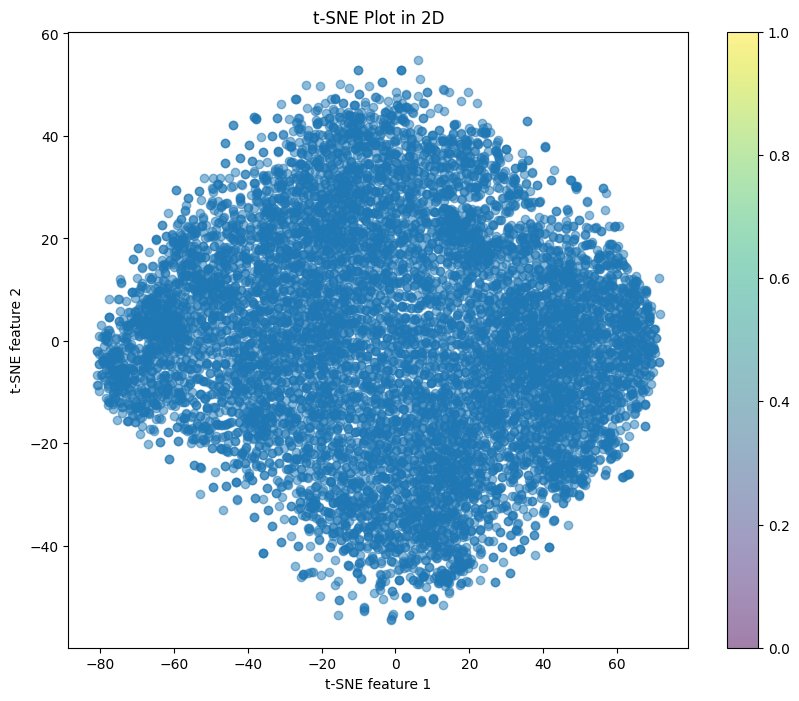

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'features' is a NumPy array containing your image features
# Convert features to a suitable format if not already done
features = np.array(features)

# Run t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
results = tsne.fit_transform(features)

# Plotting the result of t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(results[:, 0], results[:, 1], alpha=0.5)
plt.title('t-SNE Plot in 2D')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar()
plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10008 samples in 0.006s...
[t-SNE] Computed neighbors for 10008 samples in 1.171s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10008
[t-SNE] Computed conditional probabilities for sample 2000 / 10008
[t-SNE] Computed conditional probabilities for sample 3000 / 10008
[t-SNE] Computed conditional probabilities for sample 4000 / 10008
[t-SNE] Computed conditional probabilities for sample 5000 / 10008
[t-SNE] Computed conditional probabilities for sample 6000 / 10008
[t-SNE] Computed conditional probabilities for sample 7000 / 10008
[t-SNE] Computed conditional probabilities for sample 8000 / 10008
[t-SNE] Computed conditional probabilities for sample 9000 / 10008
[t-SNE] Computed conditional probabilities for sample 10000 / 10008
[t-SNE] Computed conditional probabilities for sample 10008 / 10008
[t-SNE] Mean sigma: 9.506460
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.256302
[t-SNE] KL 

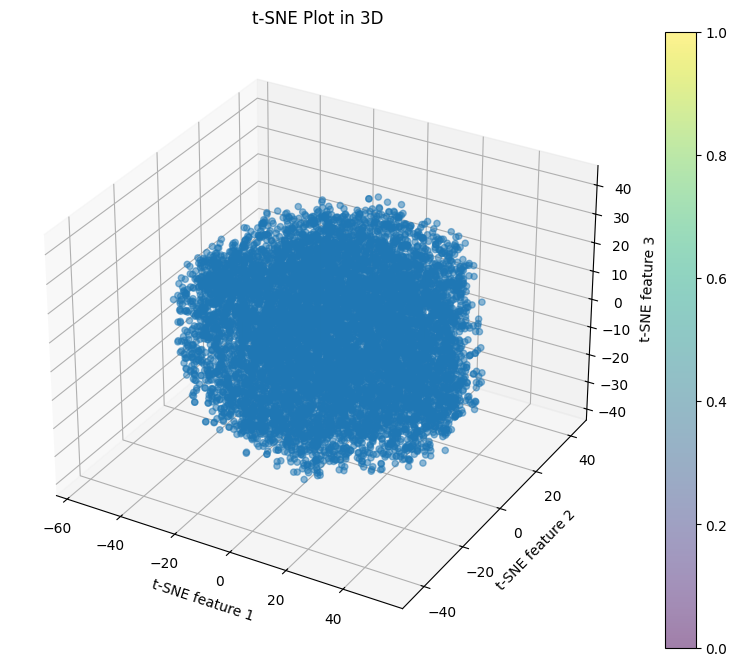

In [38]:
from mpl_toolkits.mplot3d import Axes3D

# Run t-SNE for 3 dimensions
tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=1000)
results_3d = tsne.fit_transform(features)

# Plotting the result of t-SNE in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(results_3d[:, 0], results_3d[:, 1], results_3d[:, 2], alpha=0.5)

ax.set_title('t-SNE Plot in 3D')
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('t-SNE feature 3')
plt.colorbar(scatter)
plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10008 samples in 0.003s...
[t-SNE] Computed neighbors for 10008 samples in 1.134s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10008
[t-SNE] Computed conditional probabilities for sample 2000 / 10008
[t-SNE] Computed conditional probabilities for sample 3000 / 10008
[t-SNE] Computed conditional probabilities for sample 4000 / 10008
[t-SNE] Computed conditional probabilities for sample 5000 / 10008
[t-SNE] Computed conditional probabilities for sample 6000 / 10008
[t-SNE] Computed conditional probabilities for sample 7000 / 10008
[t-SNE] Computed conditional probabilities for sample 8000 / 10008
[t-SNE] Computed conditional probabilities for sample 9000 / 10008
[t-SNE] Computed conditional probabilities for sample 10000 / 10008
[t-SNE] Computed conditional probabilities for sample 10008 / 10008
[t-SNE] Mean sigma: 9.506460
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.225662
[t-SNE] KL 

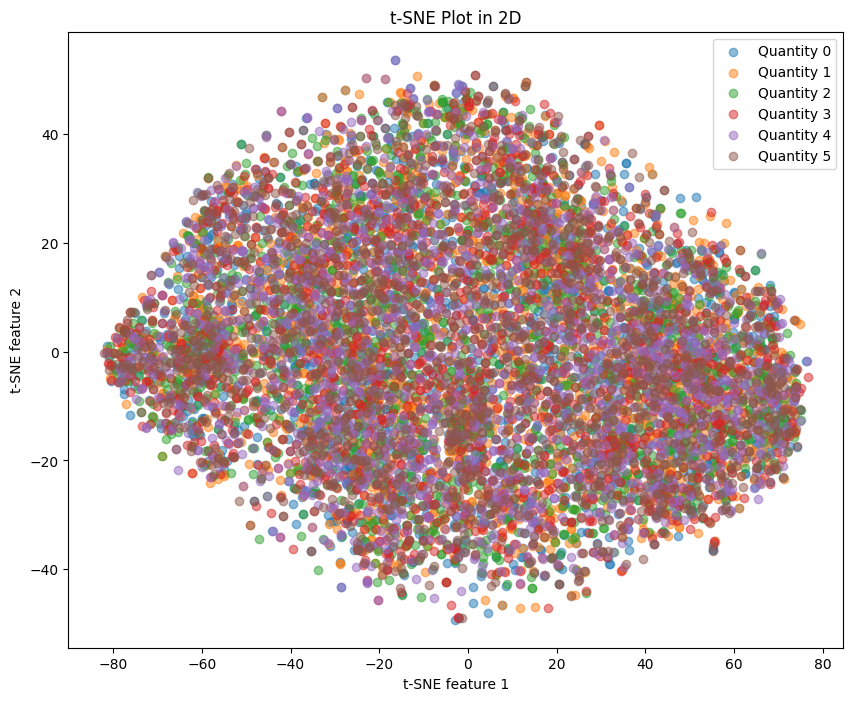

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10008 samples in 0.002s...
[t-SNE] Computed neighbors for 10008 samples in 1.137s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10008
[t-SNE] Computed conditional probabilities for sample 2000 / 10008
[t-SNE] Computed conditional probabilities for sample 3000 / 10008
[t-SNE] Computed conditional probabilities for sample 4000 / 10008
[t-SNE] Computed conditional probabilities for sample 5000 / 10008
[t-SNE] Computed conditional probabilities for sample 6000 / 10008
[t-SNE] Computed conditional probabilities for sample 7000 / 10008
[t-SNE] Computed conditional probabilities for sample 8000 / 10008
[t-SNE] Computed conditional probabilities for sample 9000 / 10008
[t-SNE] Computed conditional probabilities for sample 10000 / 10008
[t-SNE] Computed conditional probabilities for sample 10008 / 10008
[t-SNE] Mean sigma: 9.506460
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.256355
[t-SNE] KL 

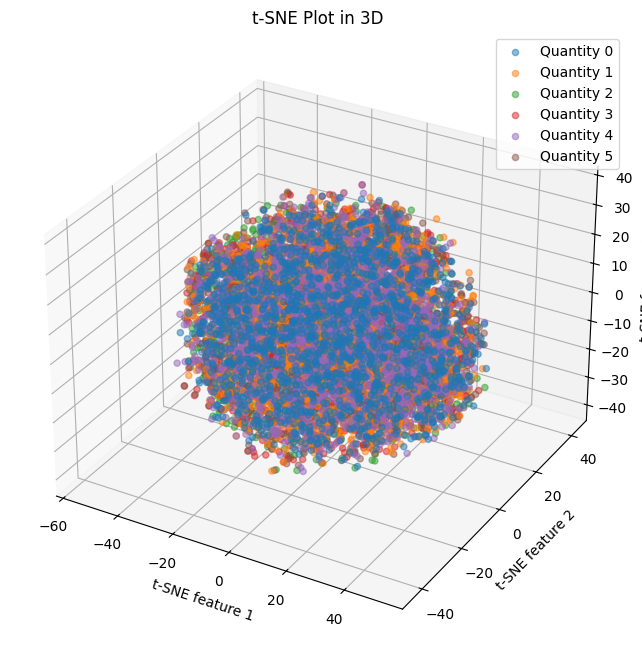

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'features' is a NumPy array containing your image features
# Convert features to a suitable format if not already done
features = np.array(features)

# Create a target array ranging from 0 to 5
target = np.random.randint(0, 6, size=len(image_files))  # Generating random quantities from 0 to 5

# Run t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
results = tsne.fit_transform(features)

# Plotting the result of t-SNE with different colors for different quantities
plt.figure(figsize=(10, 8))
for quantity in range(6):
    indices = np.where(target == quantity)
    plt.scatter(results[indices, 0], results[indices, 1], alpha=0.5, label=f'Quantity {quantity}')
plt.title('t-SNE Plot in 2D')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend()
plt.show()

# Similarly for 3D plot
# Run t-SNE for 3 dimensions
tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=1000)
results_3d = tsne.fit_transform(features)

# Plotting the result of t-SNE in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for quantity in range(6):
    indices = np.where(target == quantity)
    ax.scatter(results_3d[indices, 0], results_3d[indices, 1], results_3d[indices, 2], alpha=0.5, label=f'Quantity {quantity}')

ax.set_title('t-SNE Plot in 3D')
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('t-SNE feature 3')
plt.legend()
plt.show()


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10008 samples in 0.006s...
[t-SNE] Computed neighbors for 10008 samples in 1.237s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10008
[t-SNE] Computed conditional probabilities for sample 2000 / 10008
[t-SNE] Computed conditional probabilities for sample 3000 / 10008
[t-SNE] Computed conditional probabilities for sample 4000 / 10008
[t-SNE] Computed conditional probabilities for sample 5000 / 10008
[t-SNE] Computed conditional probabilities for sample 6000 / 10008
[t-SNE] Computed conditional probabilities for sample 7000 / 10008
[t-SNE] Computed conditional probabilities for sample 8000 / 10008
[t-SNE] Computed conditional probabilities for sample 9000 / 10008
[t-SNE] Computed conditional probabilities for sample 10000 / 10008
[t-SNE] Computed conditional probabilities for sample 10008 / 10008
[t-SNE] Mean sigma: 10.142564
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.854767
[t-SNE] K

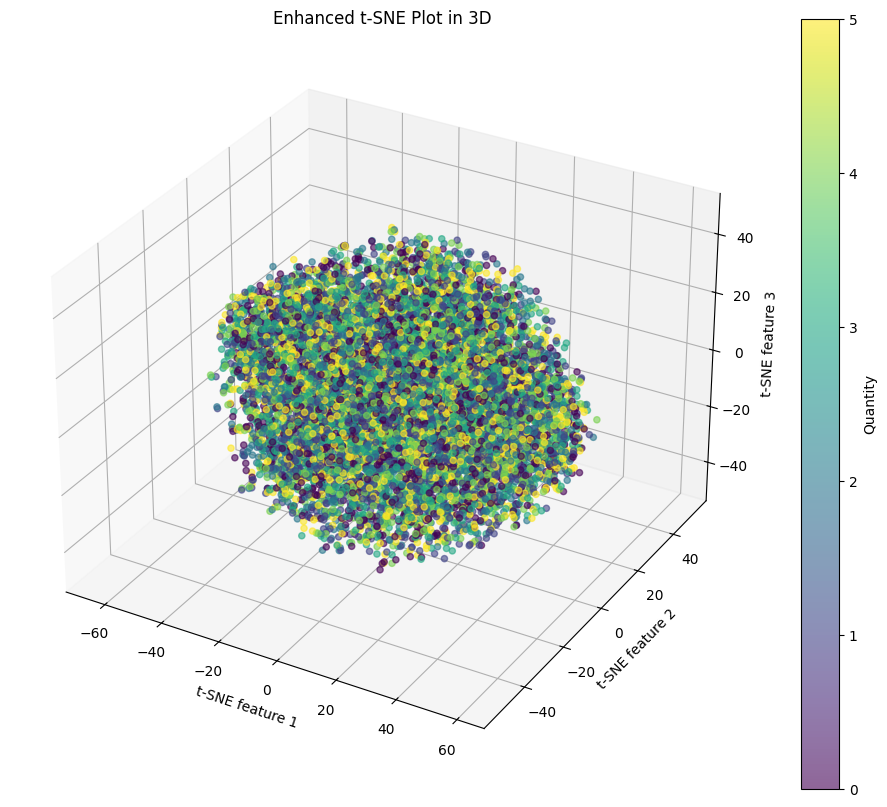

In [40]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Adjust these parameters based on your data and previous output
perplexity = 50  # Higher perplexity to consider broader context
n_iter = 3000    # More iterations for stability
learning_rate = 200  # Adjust based on your specific dataset

# Run t-SNE with adjusted parameters
tsne = TSNE(n_components=3, verbose=1, perplexity=perplexity, n_iter=n_iter, learning_rate=learning_rate)
results_3d = tsne.fit_transform(features)  # Ensure 'features' is defined and preprocessed as needed

# Plotting the result of t-SNE in 3D with adjusted visualization settings
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(results_3d[:, 0], results_3d[:, 1], results_3d[:, 2], c=target, cmap='viridis', alpha=0.6)

ax.set_title('Enhanced t-SNE Plot in 3D')
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('t-SNE feature 3')
fig.colorbar(scatter, ax=ax, label='Quantity')
plt.show()


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10008 samples in 0.007s...
[t-SNE] Computed neighbors for 10008 samples in 1.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10008
[t-SNE] Computed conditional probabilities for sample 2000 / 10008
[t-SNE] Computed conditional probabilities for sample 3000 / 10008
[t-SNE] Computed conditional probabilities for sample 4000 / 10008
[t-SNE] Computed conditional probabilities for sample 5000 / 10008
[t-SNE] Computed conditional probabilities for sample 6000 / 10008
[t-SNE] Computed conditional probabilities for sample 7000 / 10008
[t-SNE] Computed conditional probabilities for sample 8000 / 10008
[t-SNE] Computed conditional probabilities for sample 9000 / 10008
[t-SNE] Computed conditional probabilities for sample 10000 / 10008
[t-SNE] Computed conditional probabilities for sample 10008 / 10008
[t-SNE] Mean sigma: 7.972105
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.506958
[t-SNE] KL

/var/folders/9j/0m5g2l6d03z4pd5y6pt7xh1h0000gn/T/ipykernel_22065/1450265527.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 6)  # Ensure this matches the number of quantities


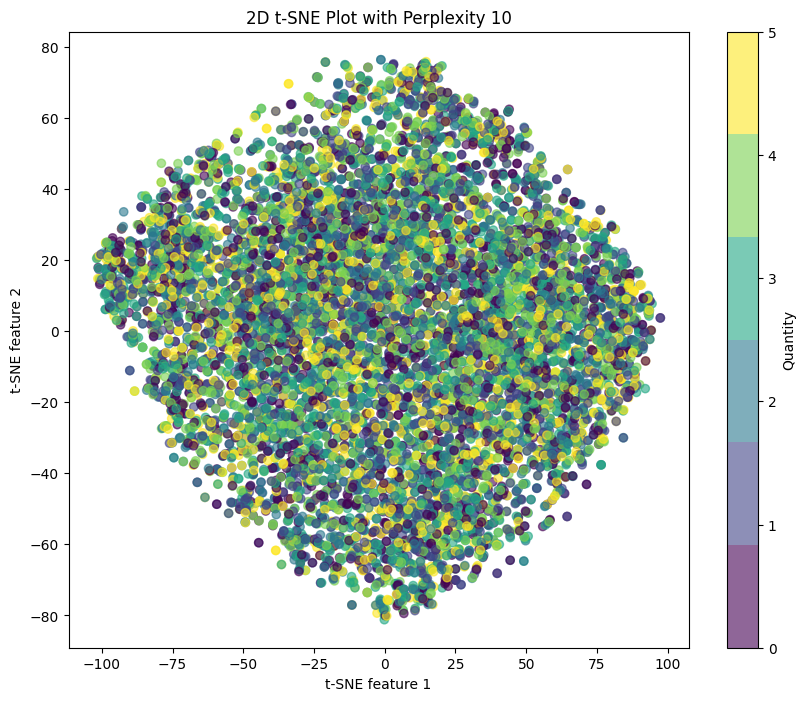

In [41]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'features' is defined and contains your data
tsne = TSNE(n_components=2, perplexity=10, n_iter=1000, learning_rate=200, verbose=1)
results_2d = tsne.fit_transform(features)

# Creating a color map
cmap = plt.cm.get_cmap('viridis', 6)  # Ensure this matches the number of quantities

plt.figure(figsize=(10, 8))
scatter = plt.scatter(results_2d[:, 0], results_2d[:, 1], c=target, cmap=cmap, alpha=0.6)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Quantity')
cbar.set_ticks(np.arange(min(target), max(target)+1))  # Set ticks for quantities

# Plot aesthetics
plt.title('2D t-SNE Plot with Perplexity 10')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

plt.show()


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10008 samples in 0.006s...
[t-SNE] Computed neighbors for 10008 samples in 1.063s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10008
[t-SNE] Computed conditional probabilities for sample 2000 / 10008
[t-SNE] Computed conditional probabilities for sample 3000 / 10008
[t-SNE] Computed conditional probabilities for sample 4000 / 10008
[t-SNE] Computed conditional probabilities for sample 5000 / 10008
[t-SNE] Computed conditional probabilities for sample 6000 / 10008
[t-SNE] Computed conditional probabilities for sample 7000 / 10008
[t-SNE] Computed conditional probabilities for sample 8000 / 10008
[t-SNE] Computed conditional probabilities for sample 9000 / 10008
[t-SNE] Computed conditional probabilities for sample 10000 / 10008
[t-SNE] Computed conditional probabilities for sample 10008 / 10008
[t-SNE] Mean sigma: 7.972105
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.595108
[t-SNE] KL

/var/folders/9j/0m5g2l6d03z4pd5y6pt7xh1h0000gn/T/ipykernel_22065/140570402.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 6)  # Adjust the '6' if you have a different number of quantities


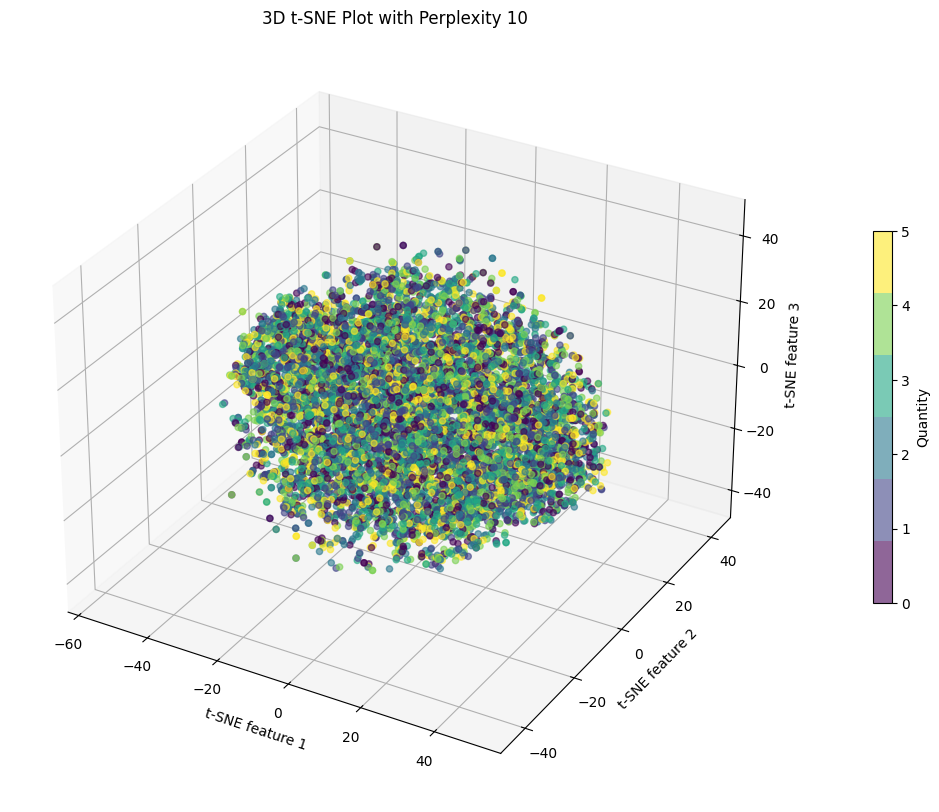

In [42]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'features' is defined and contains your data
tsne = TSNE(n_components=3, perplexity=10, n_iter=1000, learning_rate=200, verbose=1)
results_3d = tsne.fit_transform(features)

# Create a distinct and visually appealing color map
cmap = plt.cm.get_cmap('viridis', 6)  # Adjust the '6' if you have a different number of quantities

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(results_3d[:, 0], results_3d[:, 1], results_3d[:, 2], c=target, cmap=cmap, alpha=0.6)

# Adding a color bar for clarity
cbar = fig.colorbar(scatter, ax=ax, pad=0.1, fraction=0.02)
cbar.set_label('Quantity')
cbar.set_ticks(np.arange(min(target), max(target)+1))  # Set ticks for quantities

# Labeling the axes for better understanding
ax.set_title('3D t-SNE Plot with Perplexity 10')
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('t-SNE feature 3')

plt.show()
